### Organizational Network Analysis

In this part of ONA, we are going to dive into the topic of "Collaboration". The questions we would like to answer as follows:

* How is overall collaboration in the organization?
* Compare teams’ collaborations using their average centrality measures.
* Collaboration across Functional Boundaries - where collaboration is and is not occurring?
* Is there new hire onborading probelm in the organization?

In [2]:
# import library

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import scipy as sp
from netgraph import Graph
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib as matplotlib

%matplotlib inline

In [3]:
# Reading MS graph people API data

ms_people = pd.read_csv('passive_ms_new.csv')
ms_people.head()

,Employee ID_sender,Employee ID_receiver,relevanceScore,On Site Frequency_sender,Position Title_sender,Date in service_sender,Business Unit level 1_sender,Business Unit level 2_sender,On Site Frequency_receiver,Position Title_receiver,Date in service_receiver,Business Unit level 1_receiver,Business Unit level 2_receiver,Years in service_sender,Years in service_receiver
0,3007231,2003018,724.0,Hybrid,Merchandising Specialist I,2021-03-15,Brand 2,Product Merchandising - Brand 2,Hybrid,"Sr. Manager, Merchandising",2015-03-04,Brand 2,Product Merchandising - Brand 2,3.42,9.45
1,3007231,2003155,675.0,Hybrid,Merchandising Specialist I,2021-03-15,Brand 2,Product Merchandising - Brand 2,Hybrid,"Director, Business Line",2018-11-05,Brand 2,Product Merchandising - Brand 2,3.42,5.78
2,3007231,2003148,324.0,Hybrid,Merchandising Specialist I,2021-03-15,Brand 2,Product Merchandising - Brand 2,Hybrid,"Sr. Director, Marketing",2015-11-16,Brand 2,Marketing - Brand 2,3.42,8.75
3,3007231,2003133,291.0,Hybrid,Merchandising Specialist I,2021-03-15,Brand 2,Product Merchandising - Brand 2,Hybrid,"Sr. Manager, Brand Marketing",2012-06-18,Brand 2,Marketing - Brand 2,3.42,12.16
4,3007231,3022260,285.0,Hybrid,Merchandising Specialist I,2021-03-15,Brand 2,Product Merchandising - Brand 2,Hybrid,Graphic Designer I,2022-06-20,Brand 2,Marketing - Brand 2,3.42,2.15


In [4]:
# calculate how many connections are within the team in the Brand 2 organization

bridge = ms_people[ms_people['Business Unit level 2_sender'] == ms_people['Business Unit level 2_receiver']]
print('Connections within team % :', len(bridge)/len(ms_people))


Connections within team % : 0.531021897810219


In [5]:
# calculate how many connections are inside the Brand 2 organization

in_sf= ms_people[ms_people['Business Unit level 2_receiver'].isin(['Product Merchandising - Brand 2', 
                                                                     'Engineering - Brand 2',
                                                                     'Marketing - Brand 2', 
                                                                     'Customer Service - Brand 2',
                                                                     'Sales - Brand 2'])]

print('Connections inside of the Brand 2 organization % :', len(in_sf)/len(ms_people))

Connections inside of the Brand 2 organization % : 0.7536496350364964


In [6]:
# calculate how many connections are outside the Brand 2 organization

out_sf= ms_people[~ms_people['Business Unit level 2_receiver'].isin(['Product Merchandising - Brand 2', 
                                                                     'Engineering - Brand 2',
                                                                     'Marketing - Brand 2', 
                                                                     'Customer Service - Brand 2',
                                                                     'Sales - Brand 2'])]

print('Connections outside of the Brand 2 organization % :', len(out_sf)/len(ms_people))


Connections outside of the Brand 2 organization % : 0.24635036496350365


In [7]:
# loading hr information with centralities values

hr_df = pd.read_csv('passive_hr_new.csv')
len(hr_df)


155

In [8]:
# display hr_df dataframe columns

hr_df.columns

Index(['Employee ID', 'On Site Frequency', 'Position Title', 'Date in service',
       'Business Unit level 1', 'Business Unit level 2'],
      dtype='object')

In [19]:
#read hr centrality information csv file

hr_cen = pd.read_csv('hr_centrality.csv')
hr_cen.head()

,Employee ID,On Site Frequency,Position Title,Date in service,Business Unit level 1,Business Unit level 2,team_abr,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality
0,3022906,Fully Remote,Sr. Software Development Engineer II,2022-07-18,Corporate,Engineering - Brand 2,ENG_SF,0.012987,0.000000,0.000000,2.249008e-25
1,3031509,Fully Remote,Sr. Digital Marketing Specialist II,2022-12-05,Corporate,Marketing,MKT_Corp,0.019481,0.192641,0.000000,7.782638e-02
2,2003115,Hybrid,Social Media Specialist I,2021-03-01,Brand 2,Marketing - Brand 2,MKT_SF,0.019481,0.130612,0.003735,1.151750e-02
3,2001173,Hybrid,Principal Software Architect,2010-06-14,Corporate,Technology,Tech_Corp,0.006494,0.011688,0.000000,1.522579e-22
4,3023646,Fully Remote,Product Specialist II,2022-08-01,Corporate,Engineering - Brand 2,ENG_SF,0.064935,0.145334,0.081440,3.895663e-03


#### How is the overall collaboration in the organization

Using Centrality measures, including degree and closeness centrality to provide valuable insights into the structure and dynamics of the overall collaboration in the organization. 

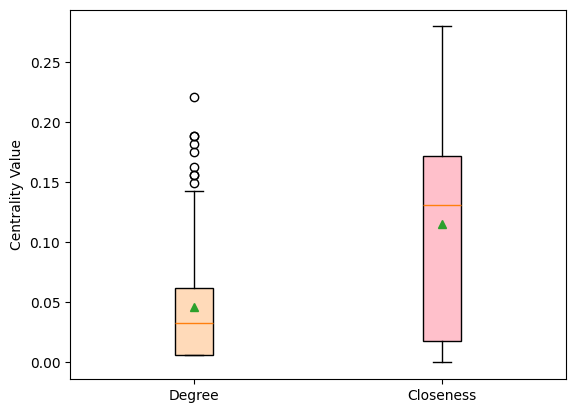

In [20]:
# plot a side by side boxplot to compare two centralities value for collaboration insights

centrality_value = [
    hr_cen['degree_centrality'],
    hr_cen['closeness_centrality'],  
]
labels = ['Degree', 'Closeness']
colors = ['peachpuff', 'pink']

fig, ax = plt.subplots()
ax.set_ylabel('Centrality Value')

bplot = ax.boxplot(centrality_value,
                   patch_artist=True,  # fill with color
                   tick_labels=labels,  # will be used to label x-ticks
                   showmeans=True)  # show mean value in boxplot

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

##### Key takeaway:

* 75% of the nodes' (employees') degree centrality value falls below 0.06.
* 50% of nodes' closeness centrality value lies above 0.014
* The average vlaue of closeness centrality is 0.012 whereas the average value of degree centrality is 0.05. Thus, the majority of employees in an organizational network have closeness centrality values higher than their degree centrality values.

##### Conclusion:

Since the majority of employees in an organizational network have closeness centrality values higher than their degree centrality values, it suggests that these employees are relatively well-connected within the organization, even if they don't have a significant number of direct connections. This can indicate a few things:

1. **Efficient Communication**:  Closeness centrality measures how close a node is to all other nodes in the network, based on the shortest path distances. With high closeness centrality indicates that employees can reach others quickly through a few intermediaries, which can facilitate efficient communication and information flow.
2. **Strategic Positioning**: These employees might be strategically positioned within the organization, allowing them to access and disseminate information effectively without needing many direct connections.
3. **Network Structure**: The network might be structured in a way that emphasizes indirect connections and pathways, rather than dense clusters of direct connections.
4. **Potential Broker**: The employee with high closeness centrality but low degree centrality might act as a broker or intermediary, connecting different parts of the network indirectly.

This scenario can be common in hierarchical or matrix organizations where communication often flows through key intermediaries rather than through direct connections between all employees. In our case, it is a corporate network, such a employee (node) might represent a key individual who, despite having few direct reports or connections, is well-placed to influence or communicate with many parts of the organization.


##### Compare Teams’ collaborations using the average centrality measures.

In [21]:
hr_cen.columns

Index(['Employee ID', 'On Site Frequency', 'Position Title', 'Date in service',
       'Business Unit level 1', 'Business Unit level 2', 'team_abr',
       'degree_centrality', 'closeness_centrality', 'betweenness_centrality',
       'eigenvector_centrality'],
      dtype='object')

In [22]:
hr_b2 = hr_cen[hr_cen['Business Unit level 2'].isin(
    ['Engineering - Brand 2', 
     'Marketing - Brand 2',
     'Product Merchandising - Brand 2', 
     'Customer Service - Brand 2', 
     'Sales - Brand 2']
)]

##### Bar Chart for Teams' Average Degree Centrality 

We are comparing teams’ collaborations using each team's average centrality measures in the organization. Centrality measures includes degree, betweenness, closeness, and eigenvector centrality, which can provide valuable insights into the structure and dynamics of team collaborations. By calculating and comparing these average centrality measures, we can gain insights into how different teams
 collaborate and their roles within the broader organizational network.

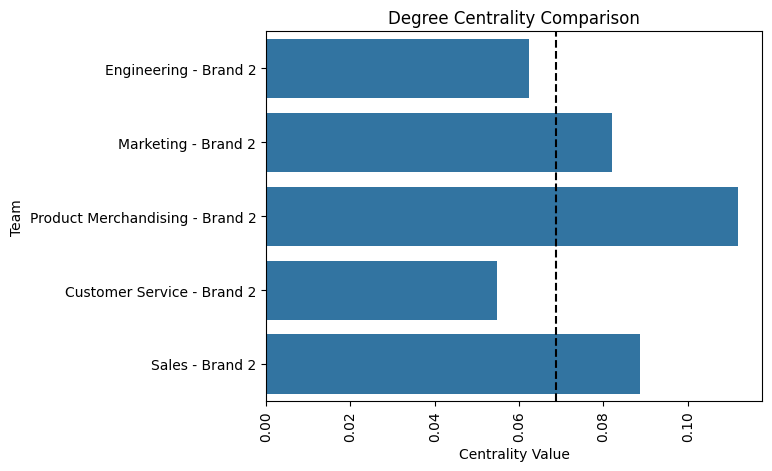

In [23]:
# Construct Bar Chart for degree centrality: 
# These are straightforward and effective for comparing averages. 
# Each bar represents a team, and the height of the bar indicates the average degree centrality.

ax = sns.barplot(
    hr_b2, y="Business Unit level 2", x="degree_centrality",
    native_scale=True,
    estimator="mean", errorbar=None,
)

#draw a vertical line for the average degree centrality of the network
plt.axvline(x=hr_b2['degree_centrality'].mean(), 
          color='black', linestyle='--')

plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Degree Centrality Comparison')
plt.xlabel('Centrality Value')
plt.ylabel('Team')
plt.show()

##### Key Takeaway:

**Degree Centrality**:
    - Interpretation: Measures the number of direct connections a node (team
    member) has, in other words - it's a count of how many social connections a employee has in this organization. High average degree centrality in a team indicates that team members are well-connected and likely to collaborate frequently.
    - Comparison: Teams with higher average degree centrality might be more
    cohesive and have better internal communication. 
**Conclusion**: 
In our case, the bar chart shows that product merchandising team has highest average value on degree centrality. Which means that team members in the product merchandising team are well-connected and may indicates these employees play central roles in communication and collaboration within the organization. In addition, for a organizational network of the size of 155, high degree centrality values might be in the range of 0.1 to 0.2, depending on the density of connections. Thus, the average degree centrality in the product merchandising team would be considered as a high degree centrality.

##### Bar Chart for Teams' Average Closeness Centrality 

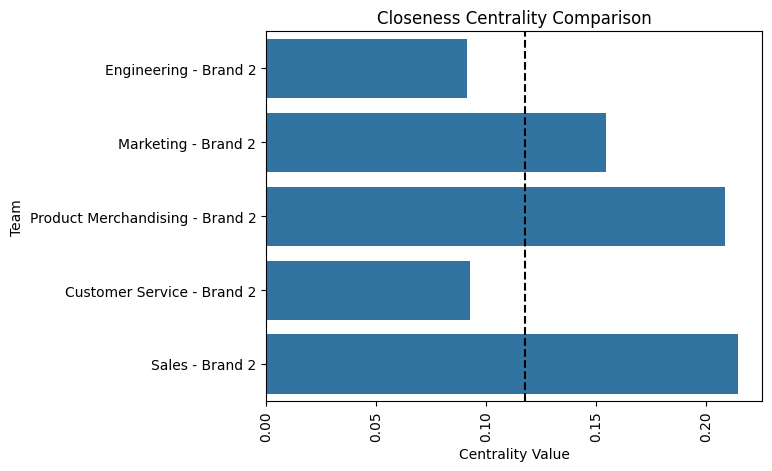

In [24]:
# Construct Bar Chart for closeness centrality: 

ax = sns.barplot(
    hr_b2, y="Business Unit level 2", x="closeness_centrality",
    native_scale=True,
    estimator="mean", errorbar=None,
)

#add a vertical line for the average closeness centrality of the network
plt.axvline(x=hr_b2['closeness_centrality'].mean(), 
          color='black', linestyle='--')

plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Closeness Centrality Comparison')
plt.xlabel('Centrality Value')
plt.ylabel('Team')
plt.show()

##### Key Takeaway:

**Closeness Centrality**:
 - Interpretation: Closeness Centrality measures how close a node (an employee) is to all other nodes (employees) in the network. High average closeness centrality indicates that team members can quickly reach others in the network.
 - Comparison: Teams with higher average closeness centrality might be more efficient in disseminating information and coordinating activities.

**Conclusion**:
As we can see from the bar chart above that comparing closeness centrality between teams, the product merchanising team and sales team hold the relatively high value on closeness centrality than other teams, which might indicates these two teams are central to the network, meaning they can communicate and disseminate information rapidly across the organization.

On the other hand, the bar chart shows the engineering and the customer service teams have relatively low closeness centrality values, which might indicate that some employees in both teams are more peripheral and takes longer to reach other employees - a sign of potential isolation.

##### Bar Chart for Teams' Average Betweenness Centrality 

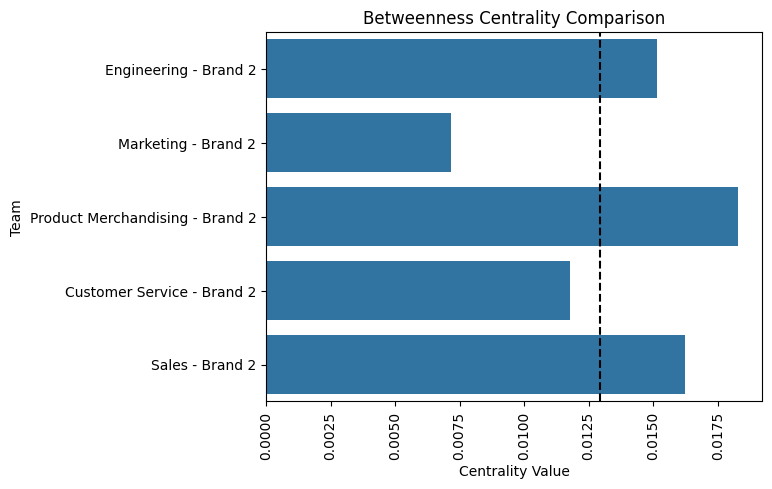

In [25]:
# Construct Bar Chart for betweenness centrality: 

ax = sns.barplot(
    hr_b2, y="Business Unit level 2", x="betweenness_centrality",
    native_scale=True,
    estimator="mean", errorbar=None,
)

#draw a vertical line for the average betweenness centrality of the network
plt.axvline(x=hr_b2['betweenness_centrality'].mean(), 
          color='black', linestyle='--')

plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Betweenness Centrality Comparison')
plt.xlabel('Centrality Value')
plt.ylabel('Team')
plt.show()

##### Key Takeaway:

**Betweenness Centrality**:
 - Interpretation: Betweeness centrality measures the extent to which a node lies on the shortest paths between other nodes. High average betweenness centrality indicates that team members often act as bridges, facilitating communication between different parts of the organization.
 - Comparison: Teams with higher average betweenness centrality might play crucial roles in connecting different teams or departments.

**Conclusion**:
The bar chart above shows that there are three teams have relatively high betweenness centrality values which are higher than the average value of the betweenness centrality, including the product merchandising, the sales and the engineering teams. This could indicates that these three teams play a bridge role to connect different teams or departments in the organization.

On the other hand, the marketing team has a low betweenness centrality, which typically indicates the team with fewer intermediary roles in the network. This means that members of this team are not frequently on the shortest paths between other nodes (teams or individuals), indicating that they do not act as key connectors or brokers of information between different parts of the organization.

##### Characteristics of Teams with Low Betweenness Centrality:

1. **High Internal Connectivity**: These teams might have strong internal connections but fewer connections to other teams. They operate more independently and rely less on external interactions.
2. **Specialized Roles**: Teams with specialized functions that do not require frequent interaction with other departments might exhibit low betweenness centrality.
3. **Closed Networks**: In a closed network, members are highly interconnected with each other, reducing the need for intermediaries³.
4. **Low Influence on Information Flow**: These teams have less influence on the overall flow of information within the organization, as they are not central to the communication pathways⁴.

##### Implications

- **Limited Influence**: Teams with low betweenness centrality may have limited influence on organizational decisions and information dissemination.
- **Potential Silos**: Such teams might operate in silos, focusing on their tasks without much interaction with other parts of the organization.
- **Focused Expertise**: These teams can focus deeply on their specialized tasks without the distraction of cross-departmental communication.



##### Bar Chart for Teams' Average Eigenvector Centrality 

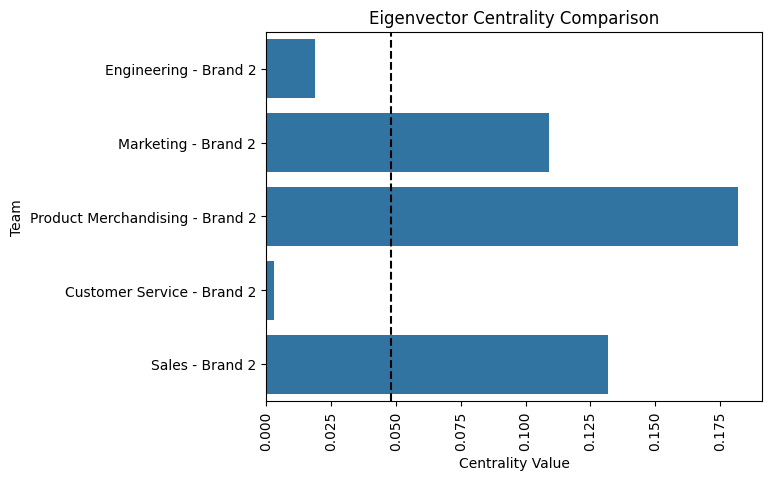

In [26]:
# Construct Bar Chart for eigenvector centrality: 

ax = sns.barplot(
    hr_b2, y="Business Unit level 2", x="eigenvector_centrality",
    native_scale=True,
    estimator="mean", errorbar=None,
)

#add a vertical line for the average eigenvector centrality of the network
plt.axvline(x=hr_b2['eigenvector_centrality'].mean(), 
          color='black', linestyle='--')

plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Eigenvector Centrality Comparison')
plt.xlabel('Centrality Value')
plt.ylabel('Team')
plt.show()

##### Key Takeaway:

 **Eigenvector Centrality**:
 - Interpretation: Eigenvector centrality measures the influence of a node based on the importance of its neighbors. High average eigenvector centrality indicates that team members are connected to other influential members in the network.
 - Comparison: Teams with higher average eigenvector centrality might have more influence within the organization.

 **Conclusion**:
 The produt merchandising team, sales team and marketing team have a relatively high eigenvector centrality, which indicates these teams are highly influential and well-connected to other influential employees in the organization.

 On the other hand, there are two teams with low eigenvector centrality typically has fewer connections to other highly connected nodes, including the engineering and customer service teams. Eigenvector centrality measures not just the number of connections a node has, but also the quality of those connections. Nodes connected to other well-connected nodes have higher eigenvector centrality.

##### Characteristics of Teams with Low Eigenvector Centrality

1. **Peripheral Position**: These teams are often on the periphery of the network, meaning they are not central to the main flow of information and interactions.
2. **Limited Influence**: They have less influence within the organization because they are not connected to the key influencers or central nodes.
3. **Specialized Roles**: Teams with specialized, isolated functions might exhibit low eigenvector centrality because their work does not require extensive interaction with other parts of the organization.
4. **Potential Silos**: These teams might operate in silos, focusing on their tasks without much interaction with other teams.

##### Implications

- **Reduced Access to Information**: Teams with low eigenvector centrality might have limited access to critical information and resources that flow through the network.
- **Lower Visibility**: These teams might be less visible within the organization, which can impact their ability to influence decisions and contribute to broader organizational goals.
- **Focused Expertise**: While they might be less connected, these teams can focus deeply on their specialized tasks without the distraction of extensive cross-departmental communication.



##### Insight for the Product Merchandising Team

The overall result shows that the product merchandising team with the highest average values on degree, closeness, betweenness, and eigenvector centrality in an organizational network analysis, which indicates that this team is likely to be a key player in the organization. Here’s what each of these high centrality measures indicates about the team:

##### Degree Centrality
- **High Connectivity**: The team has a large number of direct connections with other teams or individuals. This suggests they are highly engaged and have numerous direct interactions within the organization.

##### Closeness Centrality
- **Efficient Communication**: The team can quickly reach other teams or individuals within the network. They are well-positioned to disseminate information rapidly and efficiently across the organization.

##### Betweenness Centrality
- **Key Intermediaries**: The team often acts as a bridge between different parts of the network. They play a crucial role in facilitating communication and information flow between otherwise disconnected groups.

##### Eigenvector Centrality
- **Influential Connections**: The team is connected to other highly influential teams or individuals. This indicates that they not only have many connections but also have connections with other important nodes in the network.

##### Implications
- **Strategic Importance**: Such a team is strategically important for the organization. They are likely to be involved in critical projects and decision-making processes.
- **Information Hubs**: They serve as major hubs for information flow, ensuring that knowledge and updates are efficiently spread throughout the organization.
- **Influence and Leadership**: The team likely holds significant influence and leadership within the organization, shaping policies, strategies, and initiatives.



##### Insight for the Engineering Team and the Customer Service team

The result also tell us that there are two teams with relatively low average values on degree, closeness, and eigenvector centrality in an organizational network analysis, which are the egineering and the customer service teams, this means that the two teams typically occupy a peripheral position within the network. 

##### Implications
- **Isolated Operations**: Such teams might operate in isolation, focusing on their tasks without much interaction with other parts of the organization.
- **Reduced Access to Information**: They may have limited access to critical information and resources that flow through the network, potentially impacting their performance and decision-making.
- **Lower Visibility**: These teams might be less visible within the organization, which can affect their ability to influence decisions and contribute to broader organizational goals.
- **Specialized Roles**: They might be involved in specialized functions that do not require extensive interaction with other teams.

In [27]:
# The graph is created from the ms_people dataframe of the edges:


# Graph for connection among employees
CG =nx.from_pandas_edgelist(ms_people, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.DiGraph())
G =nx.from_pandas_edgelist(ms_people, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"] , create_using=nx.Graph())

# Graph for connection among departments
DG= nx.from_pandas_edgelist(ms_people, source= "Business Unit level 2_sender", 
                            target = "Business Unit level 2_receiver", 
                            edge_attr=True, 
                            create_using=nx.DiGraph())
GG= nx.from_pandas_edgelist(ms_people, source= "Business Unit level 2_sender", 
                            target = "Business Unit level 2_receiver", 
                            edge_attr=True, 
                            create_using=nx.Graph())

In [28]:
# define a function that generating daraframe for each team within the Brand 2

def subset1(level2):
    sub = hr_cen[hr_cen['Business Unit level 2'] == str(level2)]
    return sub

# define a function that generating daraframe for any business unit outside the Brand 2

def subset(level1):
    sub = hr_cen[hr_cen['Business Unit level 1'] == str(level1)]
    return sub

lr = subset1('Leadership')
slr = lr[lr['Employee ID'] == 3040598]
seng = subset1('Engineering - Brand 2')
smt = subset1('Marketing - Brand 2')
spm = subset1('Product Merchandising - Brand 2')
ssale = subset1('Sales - Brand 2')
scs = subset1('Customer Service - Brand 2')

opera = subset('Operations')
lifet = subset('Brand 3')
corp_1 = subset('Corporate')
corp_2 = corp_1[corp_1['Business Unit level 2'] != 'Engineering - Brand 2']
corp = corp_2[corp_2['Employee ID'] != 3040598]
shfycs = subset('Brand 1 Consumer')

In [29]:
# create a dic mapping employee id with business unit level 2 for network graph

dic_1 = {}
for i in [seng, smt, spm, ssale, scs]:
    for j in range(len(i)):
        dic_1[i['Employee ID'].iloc[j]] = i['Business Unit level 2'].iloc[j]

In [30]:
# mapping colors to each team

colors = ['tab:orange', 'tab:green', 'tab:red', 'tab:blue','tab:cyan']
nodeLegend = {}
keys = ['Engineering - Brand 2', 'Marketing - Brand 2',
        'Product Merchandising - Brand 2', 'Sales - Brand 2', 'Customer Service - Brand 2']
for i in range(len(keys)):
    nodeLegend[keys[i]] = colors[i]
nodeLegend

{'Engineering - Brand 2': 'tab:orange',
 'Marketing - Brand 2': 'tab:green',
 'Product Merchandising - Brand 2': 'tab:red',
 'Sales - Brand 2': 'tab:blue',
 'Customer Service - Brand 2': 'tab:cyan'}

In [31]:
# mapping colors to each employee id

node_color_1 = {node: nodeLegend[community_id] for node, community_id in dic_1.items()}


In [32]:
# extract network connections only occuring in Brand 2 organization

lr_na = ms_people[(ms_people['Employee ID_sender'] != 3040598) & (ms_people['Employee ID_receiver'] != 3040598)]
sf_em = lr_na['Employee ID_sender'].unique()
sf_people = lr_na[lr_na['Employee ID_receiver'].isin(sf_em)]
len(sf_people['Employee ID_receiver'].unique())
len(sf_em)

90

In [33]:
# using node shape and node size to differentiate manager and employees in a team

mg = [3021660, 2003036, 2003148, 3042370, 2003155, 2003173]
node_shape ={}
for i in sf_em:
    if i in mg:
        node_shape[i] = 'v'
    else:
        node_shape[i] = 'o'
node_size = {}
for i in sf_em:
    if i in mg:
        node_size[i] = 2
    else:
        node_size[i] = 1

In [34]:
# Subgroup for Brand 2 organization only

SFG = CG.subgraph(list(sf_em))
SFG.number_of_nodes()

90

In [35]:
SFG.number_of_edges()

407

##### The Brand 2 Organization Network Graph

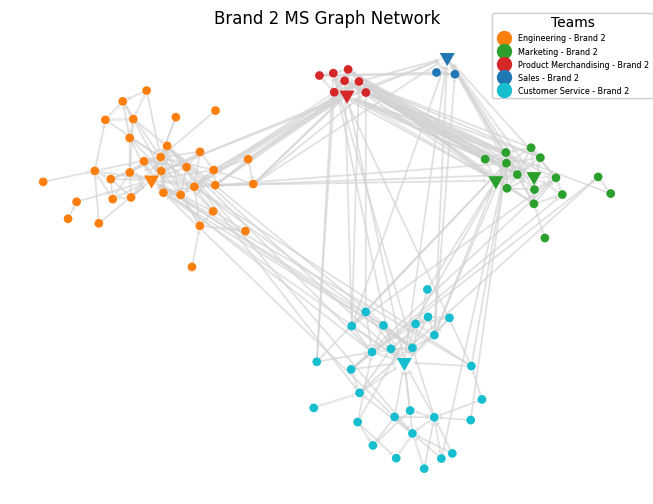

In [45]:
from netgraph import Graph
np.random.seed(0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis("off")
Graph(SFG,
      node_color=node_color_1, node_edge_width=0, edge_alpha=0.7,
      node_layout='community', node_layout_kwargs=dict(node_to_community=dic_1),
      edge_layout='straight', edge_layout_kwargs=dict(k=2000),
      edge_width=0.4, arrows=True, edge_color='lightgrey',
      node_size = node_size, node_shape = node_shape,
)
# Create proxy artists for legend handles.

node_proxy_artists = []
for node in keys:
    proxy = plt.Line2D(
        [], [],
        linestyle='None',
        color=nodeLegend[node], 
        marker='o',
        markersize= 10, 
        label=node
    )
    node_proxy_artists.append(proxy)

node_legend = ax.legend(handles=node_proxy_artists, loc='upper right', title='Teams',
                        bbox_to_anchor=(1.02, 1.05), fontsize='xx-small')

ax.add_artist(node_legend)
plt.title('Brand 2 MS Graph Network', fontsize = 12)
plt.show()

In [46]:
# creating a function for extrcting subset data form ms_people dataset

# connections within a team and among other teams
def ms_sub(team):
    sub_1 = ms_people[(ms_people['Business Unit level 2_sender'] == str(team)) |
                      (ms_people['Business Unit level 2_receiver'] == str(team))]
    return sub_1

#connections only within a team
def team(unit):
    sub_2 = ms_people[(ms_people['Business Unit level 2_sender'] == str(unit)) &
                      (ms_people['Business Unit level 2_receiver'] == str(unit))]
    return sub_2

In [47]:
sf_e = list(ms_people['Employee ID_sender'].unique())
new_p = ms_people[ms_people['Employee ID_receiver'].isin(sf_em)].reset_index(drop=True)
new_p

#connections within a team and among other teams in Brand 2 organization
def sf_sub(team):
    sub_1 = new_p[(new_p['Business Unit level 2_sender'] == str(team)) |
                      (new_p['Business Unit level 2_receiver'] == str(team))]
    return sub_1

In [48]:
# Creating a dataframe and graph for each team in Brand 2 organization

# Customer Service ---------------------------------------------------------
custom_sf = sf_sub('Customer Service - Brand 2')
CSG_sf =nx.from_pandas_edgelist(custom_sf, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.DiGraph())
ICSG_sf =nx.from_pandas_edgelist(custom_sf, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.Graph())
# Engineering --------------------------------------------------------------
eng_sf = sf_sub('Engineering - Brand 2')
EG_sf =nx.from_pandas_edgelist(eng_sf, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.DiGraph())
IEG_sg =nx.from_pandas_edgelist(eng_sf, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.Graph())
# Marketing ----------------------------------------------------------------
mkt_sf = sf_sub('Marketing - Brand 2')
MG_sf =nx.from_pandas_edgelist(mkt_sf, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.DiGraph())
IMG_sf =nx.from_pandas_edgelist(mkt_sf, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.Graph())
# Product Merchandishing ---------------------------------------------------
pm_sf = sf_sub('Product Merchandising - Brand 2')
PG_sf =nx.from_pandas_edgelist(pm_sf, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.DiGraph())
IPG_df =nx.from_pandas_edgelist(pm_sf, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.Graph())
# Sales --------------------------------------------------------------------
sales_sf = sf_sub('Sales - Brand 2')
SG_sf =nx.from_pandas_edgelist(sales_sf, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.DiGraph())
ISG_sf =nx.from_pandas_edgelist(sales_sf, source="Employee ID_sender", target="Employee ID_receiver",
                            edge_attr=["relevanceScore"], create_using=nx.Graph())

In [49]:
# Creating a dataframe and graph for each team

# Customer Service ---------------------------------------------------------
only_cus = team('Customer Service - Brand 2')
cs_members = list(hr_df[hr_df['Business Unit level 2'] == 'Customer Service - Brand 2']['Employee ID'])
OCG = CG.subgraph(cs_members)
CIG = G.subgraph(cs_members)
# Engineering ---------------------------------------------------------------
only_eng = team('Engineering - Brand 2')
eng_members = list(hr_df[hr_df['Business Unit level 2'] == 'Engineering - Brand 2']['Employee ID'])
OEG = CG.subgraph(eng_members)
EIG = G.subgraph(eng_members)
# Marketing -----------------------------------------------------------------
only_mkt = team('Marketing - Brand 2')
mkt_members = list(hr_df[hr_df['Business Unit level 2'] == 'Marketing - Brand 2']['Employee ID'])
OMG = CG.subgraph(mkt_members)
MIG = G.subgraph(mkt_members)
# Product Merchdishing ------------------------------------------------------
only_pm = team('Product Merchandising - Brand 2')
pm_members = list(hr_df[hr_df['Business Unit level 2'] == 'Product Merchandising - Brand 2']['Employee ID'])
OPG = CG.subgraph(pm_members)
PIG = G.subgraph(pm_members)
# Sales ---------------------------------------------------------------------
only_sales = team('Sales - Brand 2')
s_members = list(hr_df[hr_df['Business Unit level 2'] == 'Sales - Brand 2']['Employee ID'])
OSG = CG.subgraph(s_members)
SIG = G.subgraph(s_members)



In [50]:
# extract only brand 2 organization people from hr data

sf_1 = hr_df[hr_df['Employee ID'].isin(list(ms_people['Employee ID_sender'].unique()))]
sf_1.head()

,Employee ID,On Site Frequency,Position Title,Date in service,Business Unit level 1,Business Unit level 2
0,3022906,Fully Remote,Sr. Software Development Engineer II,2022-07-18,Corporate,Engineering - Brand 2
2,2003115,Hybrid,Social Media Specialist I,2021-03-01,Brand 2,Marketing - Brand 2
4,3023646,Fully Remote,Product Specialist II,2022-08-01,Corporate,Engineering - Brand 2
6,3020739,Fully Remote,"Manager, Product Sourcing",2022-03-28,Brand 2,Product Merchandising - Brand 2
9,3043751,Hybrid,Merchandising Specialist II,2024-03-18,Brand 2,Product Merchandising - Brand 2


##### Cross Functional Collaboration

In this section, we are going to compute the corss functional collaboration percentage by using two perspective as following:

1. The first method: Calculating collaboration percentage based on a team's overall connection: This mothod would see the team's total connection as 100% (the sum of a row), and calculate a proportion of connection the team with other teams. 

2. The second method - only focuses on collaborations that happened in Brand 2: we are looking at the percentage of collaborative relationships that existed within and between each specific team (out of 100% possible in each cell). We condiser a network that is merged by two teams as a whole (100% is this network's total connections), and we then calculate the proportion of the connations that only existed between the selected teams. Similarly, we were also able to determine which of the merged teams had integrated well with other divisions.

3. The third method - only focuses on collaborations that happened in Brand 2: Using network density to evaluate collaborations within team and between teams.

##### Collaboration Method 1

In [51]:
# a function to calculate corss functional collaboration percentage for the method 1

key1 = ['Engineering - Brand 2', 'Marketing - Brand 2',
        'Product Merchandising - Brand 2', 'Customer Service - Brand 2',
        'Sales - Brand 2', 'Leadership']
  
def cb_p(team, teams):
        ms_team = ms_people[ms_people['Business Unit level 2_sender'] == str(team)]
        if str(teams) in keys:
                sub = subset1(str(teams))
                t_t = ms_team[ms_team['Employee ID_receiver'].isin(list(sub['Employee ID']))]
                percent = len(t_t)/len(ms_team)
        elif teams == 'Leadership':
                lr = subset1('Leadership')
                sub = lr[lr['Employee ID'] == 3040598]
                t_t = ms_team[ms_team['Employee ID_receiver'].isin(list(sub['Employee ID']))]
                percent = len(t_t)/len(ms_team)
        elif teams == 'Operations':
                sub = subset('Operations')
                t_t = ms_team[ms_team['Employee ID_receiver'].isin(list(sub['Employee ID']))]
                percent = len(t_t)/len(ms_team)
        elif teams == 'Brand 3':
                sub = subset('Brand 3')
                t_t = ms_team[ms_team['Employee ID_receiver'].isin(list(sub['Employee ID']))]
                percent = len(t_t)/len(ms_team)
        elif teams == 'Corporate':
                corp_1 = subset('Corporate')
                corp_2 = corp_1[corp_1['Business Unit level 2'] != 'Engineering - Brand 2']
                sub = corp_2[corp_2['Employee ID'] != 3040598]
                t_t = ms_team[ms_team['Employee ID_receiver'].isin(list(sub['Employee ID']))]
                percent = len(t_t)/len(ms_team)
        elif teams == 'Brand 1 Consumer':
                sub = subset('Brand 1 Consumer')
                t_t = ms_team[ms_team['Employee ID_receiver'].isin(list(sub['Employee ID']))]
                percent = len(t_t)/len(ms_team)
        return round(percent, 2)


In [53]:
# collaboration percentage table

key2 = ['Engineering - Brand 2', 'Marketing - Brand 2',
        'Product Merchandising - Brand 2', 'Customer Service - Brand 2',
        'Sales - Brand 2', 'Leadership',  'Operations', 'Corporate']
collaboration_df = pd.DataFrame(columns = key2, index = key1)
values = []
for i in key1:
    for j in key2:
        p = cb_p(str(i), str(j))
        collaboration_df.loc[i, j] = p * 100
        values.append(p)
collaboration_df

,Engineering - Brand 2,Marketing - Brand 2,Product Merchandising - Brand 2,Customer Service - Brand 2,Sales - Brand 2,Leadership,Operations,Corporate
Engineering - Brand 2,65.0,2.0,6.0,3.0,1.0,2.0,1.0,19.0
Marketing - Brand 2,0.0,57.0,20.0,0.0,6.0,4.0,6.0,7.0
Product Merchandising - Brand 2,6.0,26.0,44.0,2.0,6.0,3.0,8.0,6.0
Customer Service - Brand 2,6.0,9.0,5.0,45.0,2.0,1.0,24.0,5.0
Sales - Brand 2,0.0,22.0,6.0,0.0,33.0,6.0,28.0,6.0
Leadership,11.0,22.0,11.0,11.0,11.0,0.0,0.0,33.0


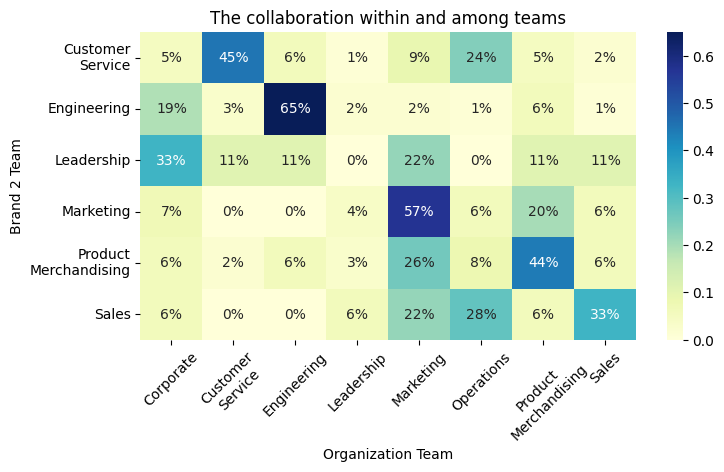

In [54]:
# plot a cross functional collaboraton heatmmap

degree_df = pd.DataFrame()
index = []
col = []
cor_percent = []
for i in key1:
    for j in key2:
        p = cb_p(str(i), str(j))
        index.append(i)
        col.append(j)
        cor_percent.append(p)

degree_df['Teams 1'] = index
degree_df['Teams 2'] = col
degree_df['percent'] = cor_percent

result = degree_df.pivot(index="Teams 1", columns="Teams 2", values="percent")
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(result, cmap="YlGnBu", annot=True, fmt=".0%")
plt.title('The collaboration within and among teams')
plt.xlabel('Organization Team')
plt.ylabel('Brand 2 Team')

plt.xticks(ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5], 
           labels = ['Corporate', 'Customer\nService', 'Engineering',
                     'Leadership', 'Marketing', 'Operations',
                     'Product\nMerchandising', 'Sales'], 
           rotation = 45)
plt.yticks(ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5], 
           labels = ['Customer\nService', 'Engineering', 'Leadership',
                     'Marketing', 'Product\nMerchandising', 'Sales'], 
                     )
plt.show()

##### Insight from the heatmap:

Here is a heatmap showing teams' cross functinal interactions. The x-axis represents different teams of the Brand 2 organization, while the y-axis represents other teams in the Brand 2/business units in the mother organization. The darker the blue colors indicate stronger collaboration, while the lighter the yellow colors show less interaction.

* Customer Service Team: For all the connections in CS team, 45% of connections are within the team. The heatmap also shows that 24% of connections in CS team are with the operations Business unit that outside the Brand 2 organization.

* Engineering Team: The heapmap shows Engineering team has strong connection within the team (65% out of total connections of Engineering team). Moreover, Engineering team also has a strong connection with the Corporate business unit which are connections outside the Brand 2 organization.

* Leadership: 33% of the Brand 2 organization leader's connections is with the Corporate business unit. Looking at the leader's connections within the brand 2 organization, 22% of connections are with marketing team, and 11% of connections with each other teams in brand 2.

* Marketing Team: For all the connections in marketing team, 57% of connections are within the team. The heatmap also shows that 20% of connections in marketing team are with product merchandising team.

* Product Merchandising Team: For all the connections in PM team, 44% of connections are within the team. The heatmap also shows that 26% of connections in the team are with Marketing team. Thus based on the heatmap result regarding Marketing and Product Merchandising teams, we conclude that these two teams relatively high degree of collaboration. 

* Sales Team: For all the connections in Sales team, 33% of connections are within the team. The heatmap also shows that 22% of connections in sales team are with marketing team that inside the Brand 2 organization, and 28% of Sales team connections are with the operations.



##### Collaboration Method 2 - Only in the Brand 2 organization

In [55]:
b2 = ms_people[ms_people['Employee ID_receiver'].isin(
    list(ms_people['Employee ID_sender'].unique()))]

def colla(team1, team2):
    if str(team1) == str(team2):
        net = b2[(b2['Business Unit level 2_sender'] == str(team1)) |
                 (b2['Business Unit level 2_receiver'] == str(team2))]
        n1 = net[(net['Business Unit level 2_sender'] == str(team1))&
                 (net['Business Unit level 2_receiver'] == str(team2))]
        p= round(len(n1)/len(net),2)
    else:
        net2 = b2[(b2['Business Unit level 2_sender'].isin([str(team1), str(team2)]))|
                  (b2['Business Unit level 2_receiver'].isin([str(team1), str(team2)]))]
        n2 = net2[(net2['Business Unit level 2_sender'] == str(team1))&
                  (net2['Business Unit level 2_receiver'] == str(team2))]
        n3 = net2[(net2['Business Unit level 2_receiver'] == str(team1))&
                  (net2['Business Unit level 2_sender'] == str(team2))]
        p = round((len(n2) + len(n3))/len(net2), 2)

    return p

In [56]:
keys = ['Customer Service - Brand 2', 'Engineering - Brand 2', 
        'Marketing - Brand 2', 'Leadership',
        'Product Merchandising - Brand 2', 'Sales - Brand 2']

new_df = pd.DataFrame(columns = keys, index = keys)

for i in keys:
    for j in keys:
        pcent = colla(str(i), str(j))
        new_df.loc[i, j] = pcent
        
new_df

,Customer Service - Brand 2,Engineering - Brand 2,Marketing - Brand 2,Leadership,Product Merchandising - Brand 2,Sales - Brand 2
Customer Service - Brand 2,0.62,0.06,0.06,0.02,0.04,0.03
Engineering - Brand 2,0.06,0.75,0.01,0.03,0.06,0.01
Marketing - Brand 2,0.06,0.01,0.45,0.04,0.2,0.07
Leadership,0.02,0.03,0.04,0.0,0.03,0.04
Product Merchandising - Brand 2,0.04,0.06,0.2,0.03,0.29,0.04
Sales - Brand 2,0.03,0.01,0.07,0.04,0.04,0.21


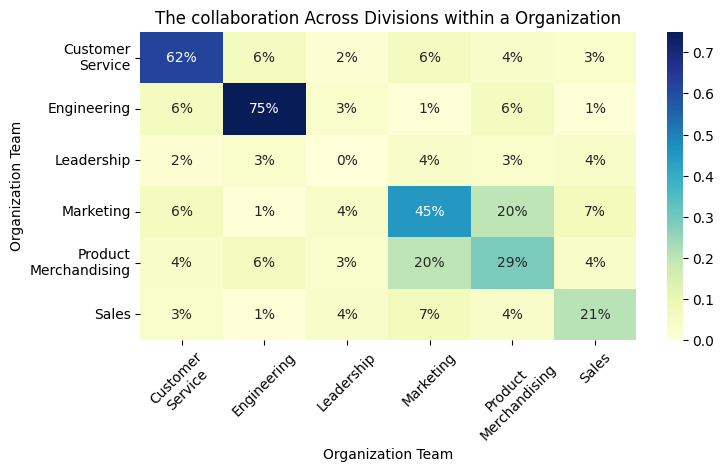

In [57]:
connet_df = pd.DataFrame()
index = []
col = []
percent = []
for i in keys:
    for j in keys:
        pc = colla(str(i), str(j))
        index.append(i)
        col.append(j)
        percent.append(pc)

connet_df['Teams 1'] = index
connet_df['Teams 2'] = col
connet_df['percent'] = percent

result = connet_df.pivot(index="Teams 1", columns="Teams 2", values="percent")
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(result, cmap="YlGnBu", annot=True, fmt=".0%")
plt.title('The collaboration Across Divisions within a Organization')
plt.xlabel('Organization Team')
plt.ylabel('Organization Team')

plt.xticks(ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5], 
           labels = ['Customer\nService', 'Engineering',
                     'Leadership', 'Marketing',
                     'Product\nMerchandising', 'Sales'], 
           rotation = 45)
plt.yticks(ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5], 
           labels = ['Customer\nService', 'Engineering', 'Leadership',
                     'Marketing', 'Product\nMerchandising', 'Sales'], 
                     )
plt.show()

##### Insight - Collaboration across Functional Boundaries with the Brand 2 Organization:

The heatmap showing teams' cross functinal interactions in the brand 2 organization. The x-axis and the y-axis represent different teams of the Brand 2 organization. The darker the blue colors indicate stronger collaboration, while the lighter the yellow colors show less interaction.

* **Customer Service and Engineering Teams**:
The results show that Customer Service and Engineering Teams both have relative high degree of internal connections can indicate effective teamwork and communication within their team, the precentages are 62% and 75% respectively. However, if this percentage is too high, it might suggest that the team is working in isolation from the rest of the organization.

* **Marketing team**:
For Marketing team, there are 45% of the connections in the team network are within the team, it suggests a moderate level of internal connectivity. This can be a good sign of strong internal collaboration.

1. **Internal Collaboration**: A high percentage of internal connections can indicate effective teamwork and communication within the team. However, if this percentage is too high, it might suggest that the team is working in isolation from the rest of the organization.

2. **External Collaboration**: The remaining 55% of connections are with other teams or external entities. This is crucial for cross-functional collaboration and innovation. It's important to ensure that these connections are strong and effective.

* **Product Merchandising**
With 29% of the connections being within the team, it indicates a more balanced network compared to Marketing. Here are some insights based on this distribution:

1. **Moderate Internal Collaboration**: A 29% internal connection rate suggests that the team has a moderate level of internal collaboration. This can be beneficial for maintaining team cohesion without becoming too insular.

2. **External Connectivity**: The remaining 71% of connections are with other teams. This is a positive sign for cross-functional collaboration and knowledge sharing, which are essential for innovation and problem-solving.


The difference between having 29% and 45% of internal connections, with 20% of external connections, can significantly impact the dynamics of your network. Here’s a breakdown of the implications:

##### 1. **Internal Collaboration**
- **29% Internal Connections - Product Merchandising**: This suggests a moderate level of internal collaboration. PM team is cohesive but not overly insular, allowing for a balance between internal focus and external engagement.
- **45% Internal Connections - Marketing**: This indicates a higher level of internal collaboration. While this can strengthen team cohesion and internal communication, it might also suggest a risk of the team becoming too isolated from the rest of the organization.

##### 2. **Potential Silos**
- **29% Internal, 20% External**: With a lower percentage of internal connections, the risk of silos is reduced. The PM team is more likely to engage with other teams, fostering a more integrated network.
- **45% Internal, 20% External**: The higher internal connection rate increases the risk of silos. The Marketing team might be more focused on internal matters, potentially at the expense of broader organizational collaboration.

##### 3. **Network Balance**
- **29% Internal, 20% External**: This configuration suggests that PM team is a more balanced network, with a reasonable level of internal cohesion and some degree of external engagement.
- **45% Internal, 20% External**: This setup indicates that Marketing is a stronger internal focus, which might be beneficial for certain projects but could hinder overall organizational integration and innovation.

In [58]:
# Calculate average density at a team level or join team level

def sfden(team1, team2):
    if str(team1) == str(team2):
        df = sf_1[sf_1['Business Unit level 2'] == str(team1)]
        G = CG.subgraph(list(df['Employee ID']))
        den= nx.density(G)
    else:
        df1 = sf_1[sf_1['Business Unit level 2'] == str(team1)]
        df2 = sf_1[sf_1['Business Unit level 2'] == str(team2)]
        new_list = list(df1['Employee ID']) + list(df2['Employee ID'])
        G = CG.subgraph(new_list)
        den= nx.density(G)
    return den

([<matplotlib.axis.YTick at 0x1c6515ebd50>,
 [Text(0, 0.5, 'Customer Service'),
  Text(0, 1.5, 'Engineering'),
  Text(0, 2.5, 'Leadership'),
  Text(0, 3.5, 'Marketing'),
  Text(0, 4.5, 'Product Merchandising'),
  Text(0, 5.5, 'Sales')])

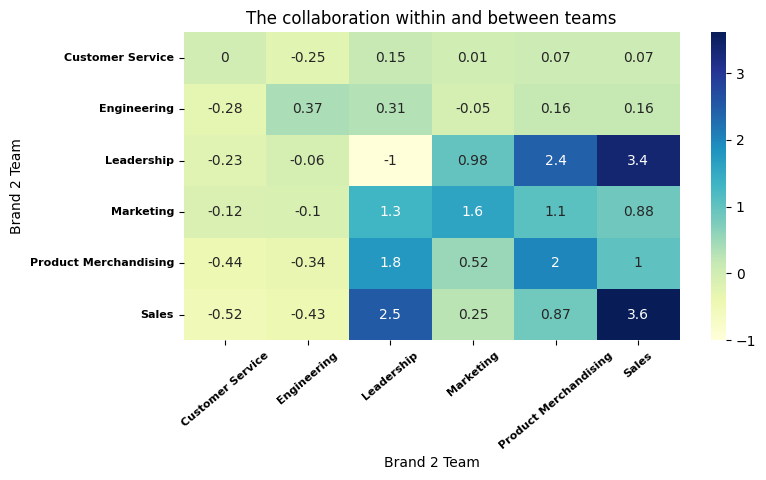

In [59]:
den_df1 = pd.DataFrame()
index = []
col = []
density = []
ds = []
for i in keys:
    for j in keys:
        d = sfden(str(i), str(j))
        ds.append(d)
        # density normalization: (x-mean)/mean
        d1 = round((d - sum(ds)/len(ds))/(sum(ds)/len(ds)), 2)
        index.append(i)
        col.append(j)
        density.append(d1)

den_df1['Teams 1'] = index
den_df1['Teams 2'] = col
den_df1['density'] = density

result = den_df1.pivot(index="Teams 1", columns="Teams 2", values="density")
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(result, cmap="YlGnBu", annot=True)
plt.title('The collaboration within and between teams')
plt.xlabel('Brand 2 Team')
plt.ylabel('Brand 2 Team')
plt.xticks(ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5], 
           labels = ['Customer Service', 'Engineering', 'Leadership', 
                     'Marketing', 'Product Merchandising', 'Sales'], 
           rotation=40, fontsize=8, fontweight='bold')
plt.yticks(ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5], 
           labels = ['Customer Service', 'Engineering', 'Leadership',
                     'Marketing', 'Product Merchandising', 'Sales'], 
           fontsize = 8, fontweight='bold')

##### Network Densities Normalization before comparing them

We normalize team network densities using a statistics approach. This approach is similar to standardizing data in statistics. Here’s how we do it:

1. **Calculate the Average Density**: Compute the average network density across all teams.
2. **Subtract the Average**: For each team's network density, subtract the average density.
3. **Divide by the Average**: Divide the result by the average density.

This normalization helps in comparing the densities relative to the average, making it easier to identify which teams have higher or lower densities compared to the overall average.

##### Interpretation of Normalized densityies:

These normalized densities can provide valuable insights into how each team's network density compares to the overall average. Here's how we can interpret these values:

### Positive Values
- **Above Average Density**: If the normalized density value is positive, it means that the team's network/the merged teams' density is above the average density of all teams. This indicates that the team has a higher-than-average level of connectivity.
- **Example**: For instance, the collaboration between sales and marketing teams is 0.25, which means the density is 25% higher than the average density. Thus, The higher the number, the more collaboration that exists. From the heatmap, sales team has highest value in the collaboratin measurement which is 3.6 time higher than average number.

### Negative Values
- **Below Average Density**: If the normalized density value is negative, it means that the team's network/the merged teams' density is below the average density of all teams. This suggests that the team has a lower-than-average level of connectivity.
- **Example**: For example, sales and engineering teams have a normalized density of -0.25 means the merged teams' density is 25% lower than the average density. Moreover, a value of -1.0 indicates that no collaboration.

### Zero Value
- **Average Density**: A normalized density value of zero indicates that the team's network density is exactly equal to the average density of all teams. This means the team's connectivity is typical compared to the overall network.
- **Example**: A normalized density of 0 means the team's density is exactly the same as the average density - the expected value.

### Practical Implications
- **High Positive Values**: Teams with high positive normalized densities might be very cohesive internally, which can be beneficial for certain projects but might also indicate potential silos.
- **High Negative Values**: Teams with high negative normalized densities might be less cohesive internally, which could suggest a need for improving internal collaboration.
- **Balanced Values**: Teams with normalized densities close to zero are well-balanced in terms of connectivity, indicating a healthy level of both internal and external collaboration.


In [60]:
sf_df = hr_df[hr_df['Employee ID'].isin(sf_em)].reset_index(drop=True)

connects = CG.degree()
connects_sf = SFG.degree()

a = [i[1] for i in list(connects_sf)]
b = [i[0] for i in list(connects_sf)]
new_c = pd.DataFrame()
new_c['Employee ID'] = b
new_c['Degree'] = a



In [61]:
from datetime import datetime
from datetime import date

sf_df = hr_df[hr_df['Employee ID'].isin(sf_em)].reset_index(drop=True)

sf_df['Date in service'] = pd.to_datetime(sf_df['Date in service'])

today = date.today()
sf_df['Years in service'] = [round((today - datetime.date(i)).days/365, 2) 
                                        for i in sf_df['Date in service']]


sf_df.head()

,Employee ID,On Site Frequency,Position Title,Date in service,Business Unit level 1,Business Unit level 2,Years in service
0,3022906,Fully Remote,Sr. Software Development Engineer II,2022-07-18,Corporate,Engineering - Brand 2,2.20
1,2003115,Hybrid,Social Media Specialist I,2021-03-01,Brand 2,Marketing - Brand 2,3.58
2,3023646,Fully Remote,Product Specialist II,2022-08-01,Corporate,Engineering - Brand 2,2.16
3,3020739,Fully Remote,"Manager, Product Sourcing",2022-03-28,Brand 2,Product Merchandising - Brand 2,2.50
4,3043751,Hybrid,Merchandising Specialist II,2024-03-18,Brand 2,Product Merchandising - Brand 2,0.53


In [62]:
c = [i[1] for i in list(connects)]
e = [i[0] for i in list(connects)]
new_c1 = pd.DataFrame()
new_c1['Employee ID'] = e
new_c1['Degree'] = c
new_c2 = new_c1[new_c1['Employee ID'].isin(list(sf_1['Employee ID']))].reset_index(drop=True) #sf_em
new_c2

,Employee ID,Degree
0,3007231,13
1,2003018,27
2,2003155,29
3,2003148,22
4,2003133,24
...,...,...
86,2002210,10
87,2003180,6
88,2002936,8
89,2002939,6


In [63]:
new_sf = sf_1.merge(new_c2, how="left", left_on="Employee ID", right_on="Employee ID") #sf_df
max(new_sf['Degree'])
new_sf['Degree'].describe()

count    91.000000
mean     10.703297
std       7.106327
min       1.000000
25%       6.000000
50%       9.000000
75%      13.000000
max      34.000000
Name: Degree, dtype: float64

<Axes: xlabel='Degree', ylabel='Count'>

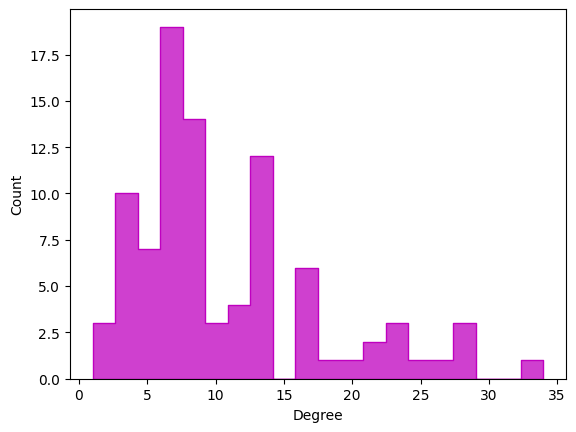

In [64]:
# histogram for brand 2 degree distribution

sns.histplot(x="Degree", bins=20, data= new_sf, element="step", color="m")

##### Identify Onboarding Issues

In [65]:
# Brand 2 network degree variable statistic information

new_sf1 = sf_df.merge(new_c2, how="left", left_on="Employee ID", right_on="Employee ID")
new_sf1['Degree'].describe()

count    90.000000
mean     10.577778
std       7.043968
min       1.000000
25%       6.000000
50%       8.500000
75%      13.000000
max      34.000000
Name: Degree, dtype: float64

In [69]:
# Brand 2 employees' years of service statistic information

new_sf1['Years in service'].describe()


count    90.000000
mean      4.604000
std       3.487737
min       0.220000
25%       1.955000
50%       3.580000
75%       7.330000
max      12.280000
Name: Years in service, dtype: float64

Text(0.5, 0, '')

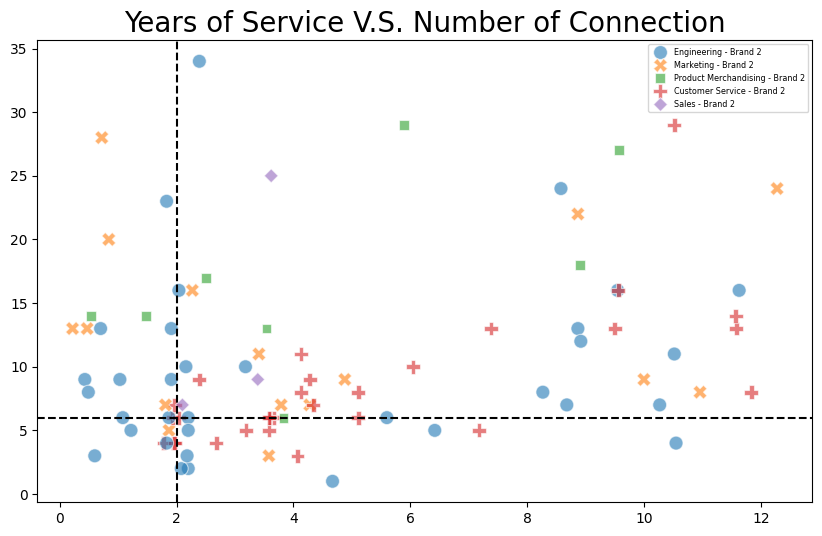

In [71]:
# scatter plot for year of service and number of connection

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=new_sf1, x="Years in service", y="Degree", 
                style="Business Unit level 2", hue= 'Business Unit level 2',
                alpha= 0.6, s= 100)

# threshold for degree of connection  (25th percentile)
plt.axhline(y = 6, color = 'black', linestyle = '--') 

# threshold for employees' year of service (25th percentile)
plt.axvline(x = 2, color = 'black', linestyle = '--') 

plt.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize='xx-small')
plt.title('Years of Service V.S. Number of Connection', fontsize = 20)
plt.ylabel('', fontsize = 12)
plt.xlabel('', fontsize = 12)

##### Insights from the Scatterplot regarding onboarding issues:

We can use the number of network connections against years of service to identify onboarding issues within an organization. This approach can provide valuable insights into how well new employees are integrating into the organizational network.


##### Steps to Identify Onboarding Issues

1. **Identify Patterns**:
   - **Onboarding Effectiveness**: Identify patterns where new hires with fewer connections or lower centrality measures might be struggling with onboarding.

   
   - **Years of Service Correlation**: Analyze if there is a correlation between years of service and network connectivity. A strong correlation might indicate that it takes a long time for employees to integrate, suggesting potential onboarding issues.

2. **Qualitative Insights**:
   - **Surveys and Interviews**: Complement quantitative data with qualitative insights from surveys and interviews. Ask new hires about their onboarding experience and any challenges they faced in building connections.


##### Conclustion:

The scatterplot shows that the brand 2 organization seems like they don't have onboarding issue since the connection range for newhires (years in service less than 2 years) is between 4 to nearly 30. However, there are some employees in Engineeing, Marketing, and Customer Service that appear to have sign of silos due to their degree of connection lower than 25th percentile or it may because of their job position and specific job roles or departments.

